# Exploratory Data Analysis using Python 

*Analyzing responses from the Stack Overflow Annual Developer Survey *

Let's load the CSV files using the pandas library.

In [99]:
import pandas as pd

In [100]:
survey_df1=pd.read_csv('survey_results_public.csv')

In [101]:
survey_df1

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [102]:
survey_df1.shape

(64461, 61)

This Dataset contains 64000 responses to the 60 questions asked in the survey.

In [103]:
survey_df1.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Looks like shorthands for the questions have been used as column names.  
Let's have a look at the survey_schema file which contains the full questions.The schema file contains two columns: Column and QuestionText.  
We can load it as Pandas Series with Column as the index and the QuestionText as the value.

In [104]:
survey_ques1=pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText

In [105]:
survey_ques1

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

**We can now use 'schema_ques' to retrieve full questions for any column in the 'survery_df' dataframe.** 

In [106]:
survey_ques1['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

## Data Preparation & Cleaning

While the survey contains a plethora of information, we'll be looking only at the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [107]:
columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

Let's create new dataframe and series with the relevant columns only.

In [108]:
survey_df=survey_df1[columns].copy()

In [109]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
survey_ques=survey_ques1[columns]

In [111]:
survey_ques

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [112]:
survey_df.shape

(64461, 20)

In [113]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [114]:
survey_df['YearsCode'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
64456    False
64457     True
64458     True
64459     True
64460     True
Name: YearsCode, Length: 64461, dtype: bool

As we can see most of the columns have the dtype `object`, maybe bcz they contain values of different dtypes.   
Only two columns `Age` and `WorkWeekHrs` have been detected as numeric columns even though some other columns have mostly numeric values.    
To continue with the analysis let's convert few more columns to numeric type while ignoring any non-numeric value. These non-numeric values will be converted to `NaN`.

In [115]:
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')

In [116]:
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode,errors='coerce')

In [117]:
survey_df['YearsCodePro']=pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

Let's see some statistics about the numeric columns in `survey_df` dataframe.

In [118]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


As we can see ,there seems to be a problem with the `Age` column as the min value is 1 and max value is 279 which is practically not possible.    
Let's fix this : We can ignore the rows where age is less than 10 or greater than 100 using `.drop` method.

In [119]:
survey_df.drop(survey_df[(survey_df.Age<10) | (survey_df.Age>100)].index,inplace=True)

In [120]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


Column `WorkWeekHrs` also seems to have a problem. Max value for this column is 475 which is not possible.     
Let's fix this: We can ignore rows where `WorkWeekHrs` is greater than 140 (~20 hrs a day).

In [121]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

Now, Let's take a look at the `Gender` column.

In [122]:
survey_df.Gender.value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

As we can see the `Gender` column allows selecting multiple options. To simplify our analysis we will remove values having more than one option.

In [123]:
import numpy as np

In [124]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [125]:
survey_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

Data Cleaning Done . Let's take a look at a random sample from the dataframe.

In [126]:
survey_df.sample(8)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
5082,Canada,58.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,33.0,30.0,HTML/CSS;Java;JavaScript;Perl;PHP;Python;SQL;S...,HTML/CSS;Java;JavaScript;Python;SQL;Swift,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,Data or business analyst;Database administrato...,46.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Fairly important
5107,New Zealand,14.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,10.0,5.0,NaN,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL;TypeScript,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,NaN,NaN,NaN
1337,Canada,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,10.0,5.0,HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python;Ruby;SQL;Swift;Type...,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, front-end;Developer, full-stack",35.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Never,Fairly important
17912,Poland,33.0,Woman,Some college/university study without earning ...,"A humanities discipline (such as literature, h...",Yes,31.0,2.0,NaN,HTML/CSS;Java;JavaScript;SQL,Go;Java;Kotlin;Objective-C;SQL;Swift,Once a year,Meditate;Play games;Call a coworker or friend;...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
523,United Kingdom,34.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",No,26.0,8.0,3.0,Bash/Shell/PowerShell;Python;R;SQL;VBA,Python,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Scientist,40.0,Slightly satisfied,Industry that I’d be working in;Remote work op...,Occasionally: 1-2 days per quarter but less th...,Fairly important
713,France,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,12.0,6.0,C;C#;C++;Java;JavaScript,Java;JavaScript,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,Critically important
52057,Kenya,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,9.0,5.0,Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ko...,NaN,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst;Data scientist or mac...,60.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Somewhat important
63626,Ethiopia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis and Visualization
Before we start asking questions, Let's understand the respondents Demographics.    
This will help us understand how representative the survey is of the worldwide programming community.

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as m
%matplotlib inline

In [128]:
sns.set_style('darkgrid')
m.rcParams['font.size']=16
m.rcParams['figure.figsize']=(12,6)
m.rcParams['figure.facecolor']='#00000000'

### Country
Let's look at the number of countries from where responses have been recorded and plot the top 15 countries.

In [129]:
survey_ques.Country

'Where do you live?'

In [130]:
survey_df['Country'].nunique()

183

Finding the countries with the highest number of responses.

In [131]:
top_countries=survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

Using a bar graph to visualize this info

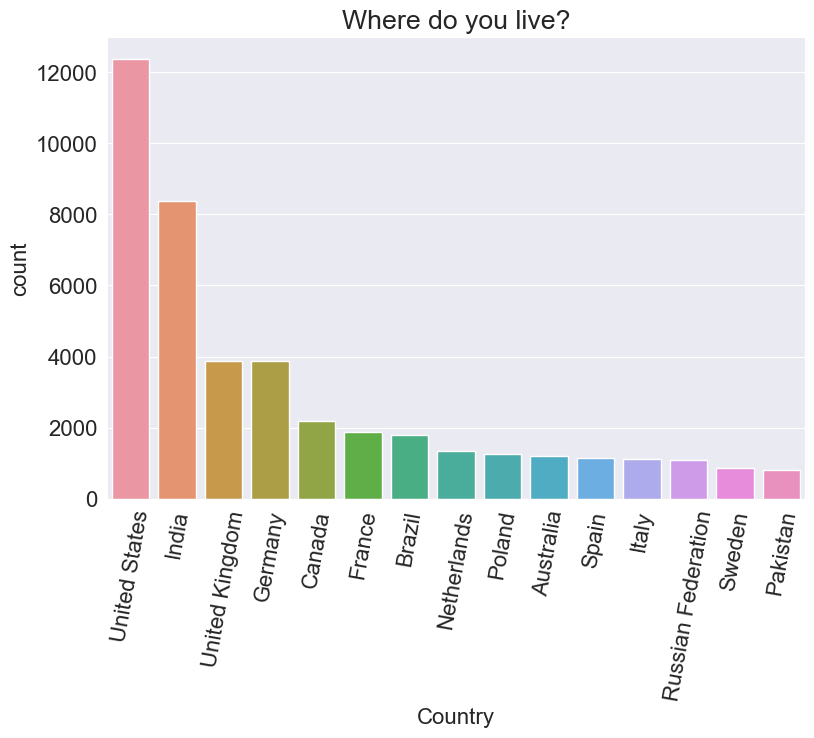

In [132]:
plt.figure(figsize=(9,6))
plt.title(survey_ques.Country)
plt.xticks(rotation=80)
sns.barplot(x=top_countries.index,y=top_countries);

As we can see most of the respondents are from US and India, which are primarily English speaking nations probably bcz the survey is in English.   
We can already see that this survey is not truly representative of the global programming community.

### Age
The distribution of respondents Age's is also a factor to look at.   
Plotting a histogram to visualize it.

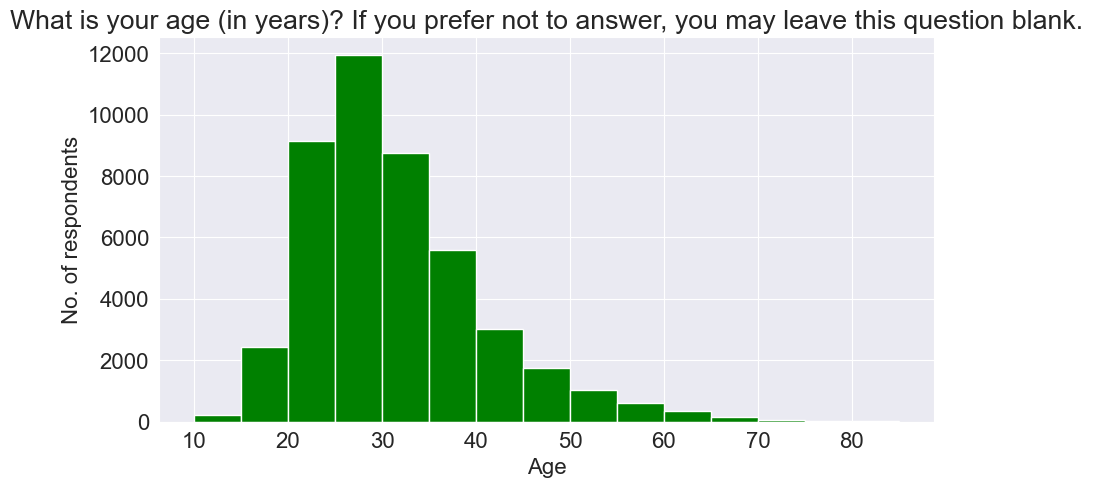

In [133]:
plt.figure(figsize=(10,5))
plt.title(survey_ques.Age)
plt.xlabel('Age')
plt.ylabel('No. of respondents')
plt.hist(survey_df.Age,bins=np.arange(10,90,5),color='g');

It appears that a major lot of the respondents is 20-40 years old.It's somewhat representative of the programming community in general. Computer Science has been a very popular choice among the youth for the past 20 years.

Adding a new column `AgeGroup` to the dataframe to divide the respondents into age groups.

In [134]:
bins=[0,10,18,30,45,60,100]
labels=['Less than 10 years','10-18 years','18-30 years','30-45 years','45-60 years','Older than 60 years']
survey_df['AgeGroup']=pd.cut(survey_df['Age'],bins=bins,labels=labels,right=False)

In [135]:
survey_df.AgeGroup.value_counts()

AgeGroup
18-30 years            22520
30-45 years            17352
45-60 years             3416
10-18 years             1181
Older than 60 years      599
Less than 10 years         0
Name: count, dtype: int64

Plotting a histogram to see the Distribution of Age based on age groups.

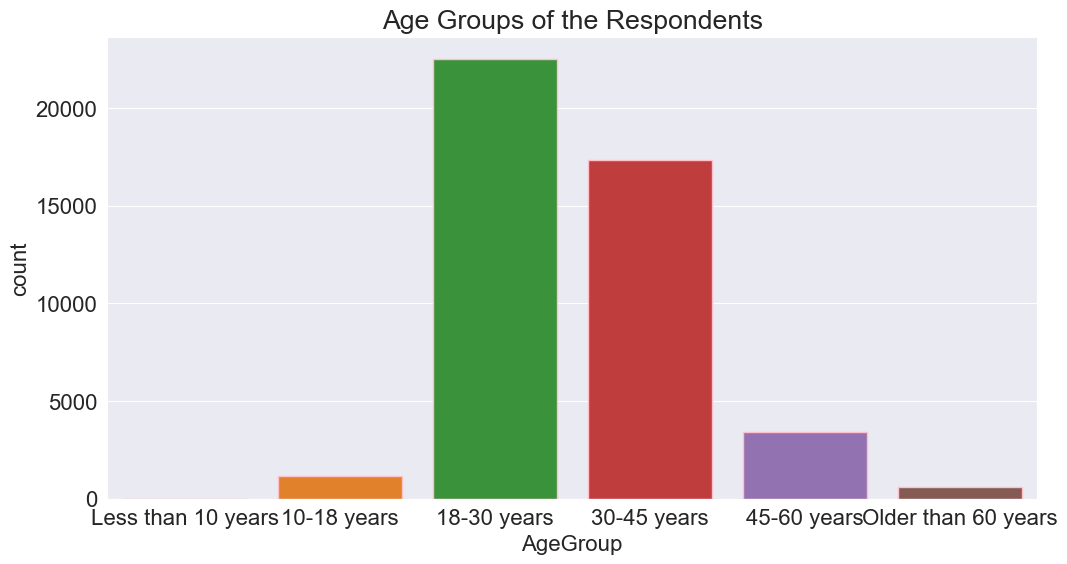

In [136]:
plt.title('Age Groups of the Respondents')
plt.xlabel('Age Groups')
plt.xticks(rotation=0)
plt.ylabel('Count')
#plt.bar(survey_df.AgeGroup.value_counts().index,survey_df.AgeGroup.value_counts(),color='g',edgecolor='k');
xax=survey_df['AgeGroup'].value_counts().index
yax=survey_df['AgeGroup'].value_counts()
sns.barplot(x=xax,y=yax,edgecolor='pink');

### Gender
Let's have a look at the Gender divide in the survey.It's a well known fact that women and non binary genders are underrepresented in the programming community, so let's see if this holds true.

In [137]:
survey_ques.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [138]:
gender_counts=survey_df['Gender'].value_counts()

Using a pie chart to showcase

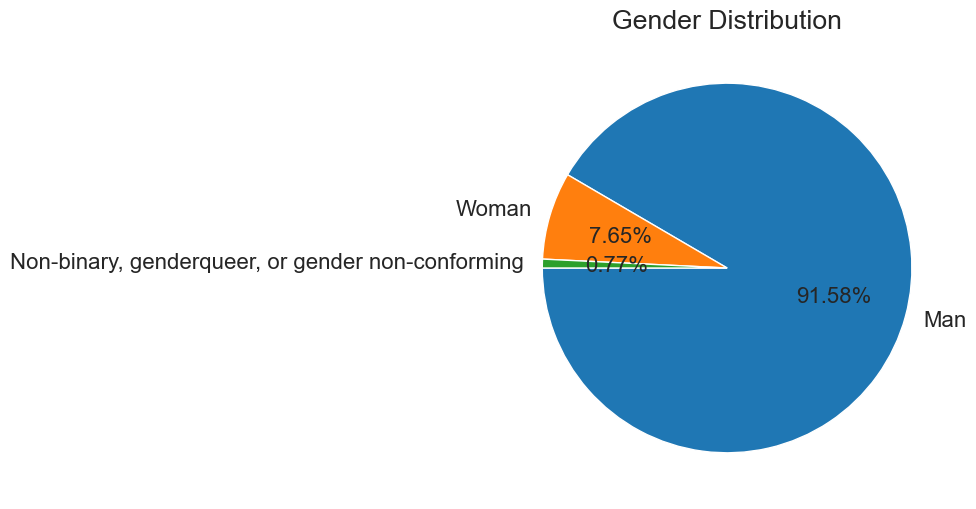

In [139]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.2f%%',startangle=180);

Only about 8% of the respondents identify as women or non-binary which is quite shocking.

### Education Level
Let's have a look at the education level of the respondents.    
Using a horizontal bar plot to visualize .

In [140]:
survey_ques.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

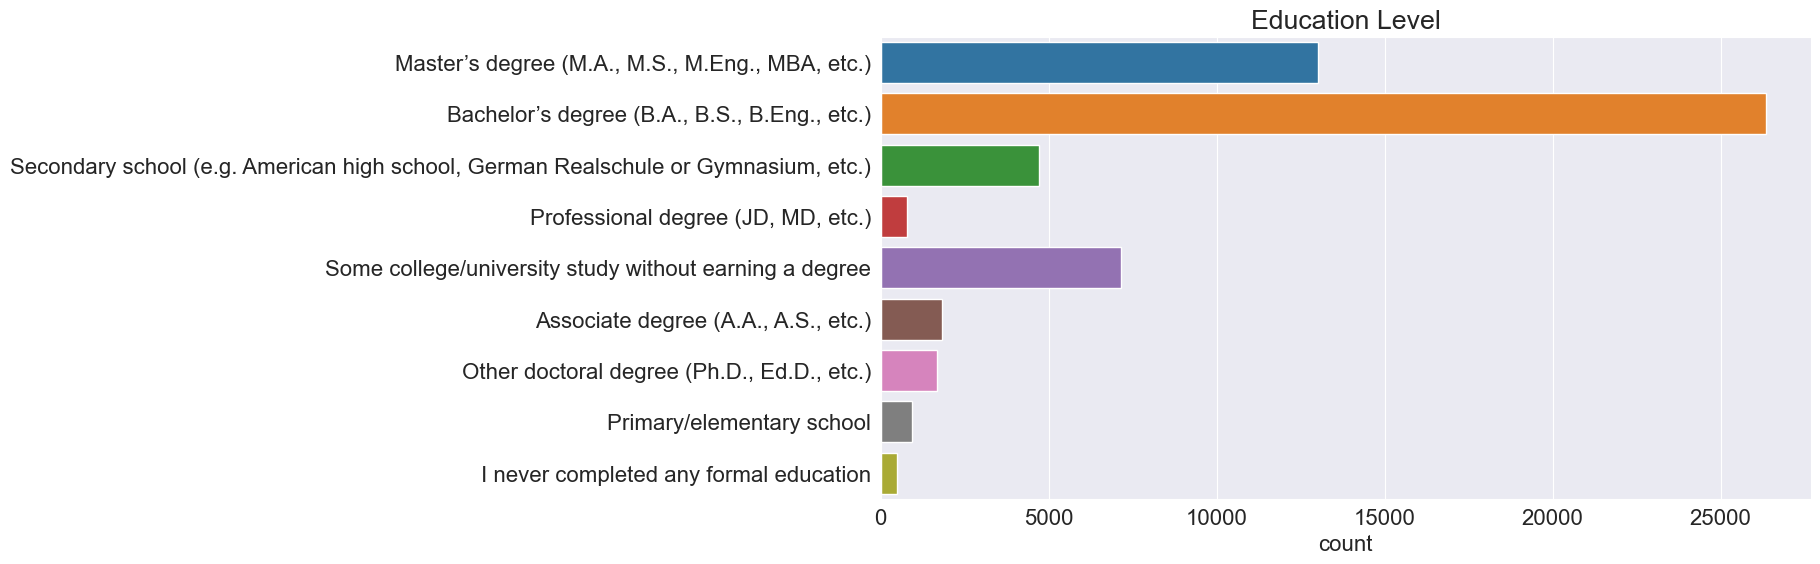

In [141]:
sns.countplot(y=survey_df.EdLevel)
plt.title('Education Level')
plt.ylabel(None);


Plotting the same graph percentage wise.

In [142]:
Edcount=survey_df['EdLevel'].value_counts()
Edlen=len(survey_df.EdLevel)
Edpct=Edcount*100/Edlen
Edpct

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          40.985289
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20.253165
Some college/university study without earning a degree                                11.138929
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7.346126
Associate degree (A.A., A.S., etc.)                                                    2.847324
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2.614064
Primary/elementary school                                                              1.444655
Professional degree (JD, MD, etc.)                                                     1.233166
I never completed any formal education                                                 0.746431
Name: count, dtype: float64

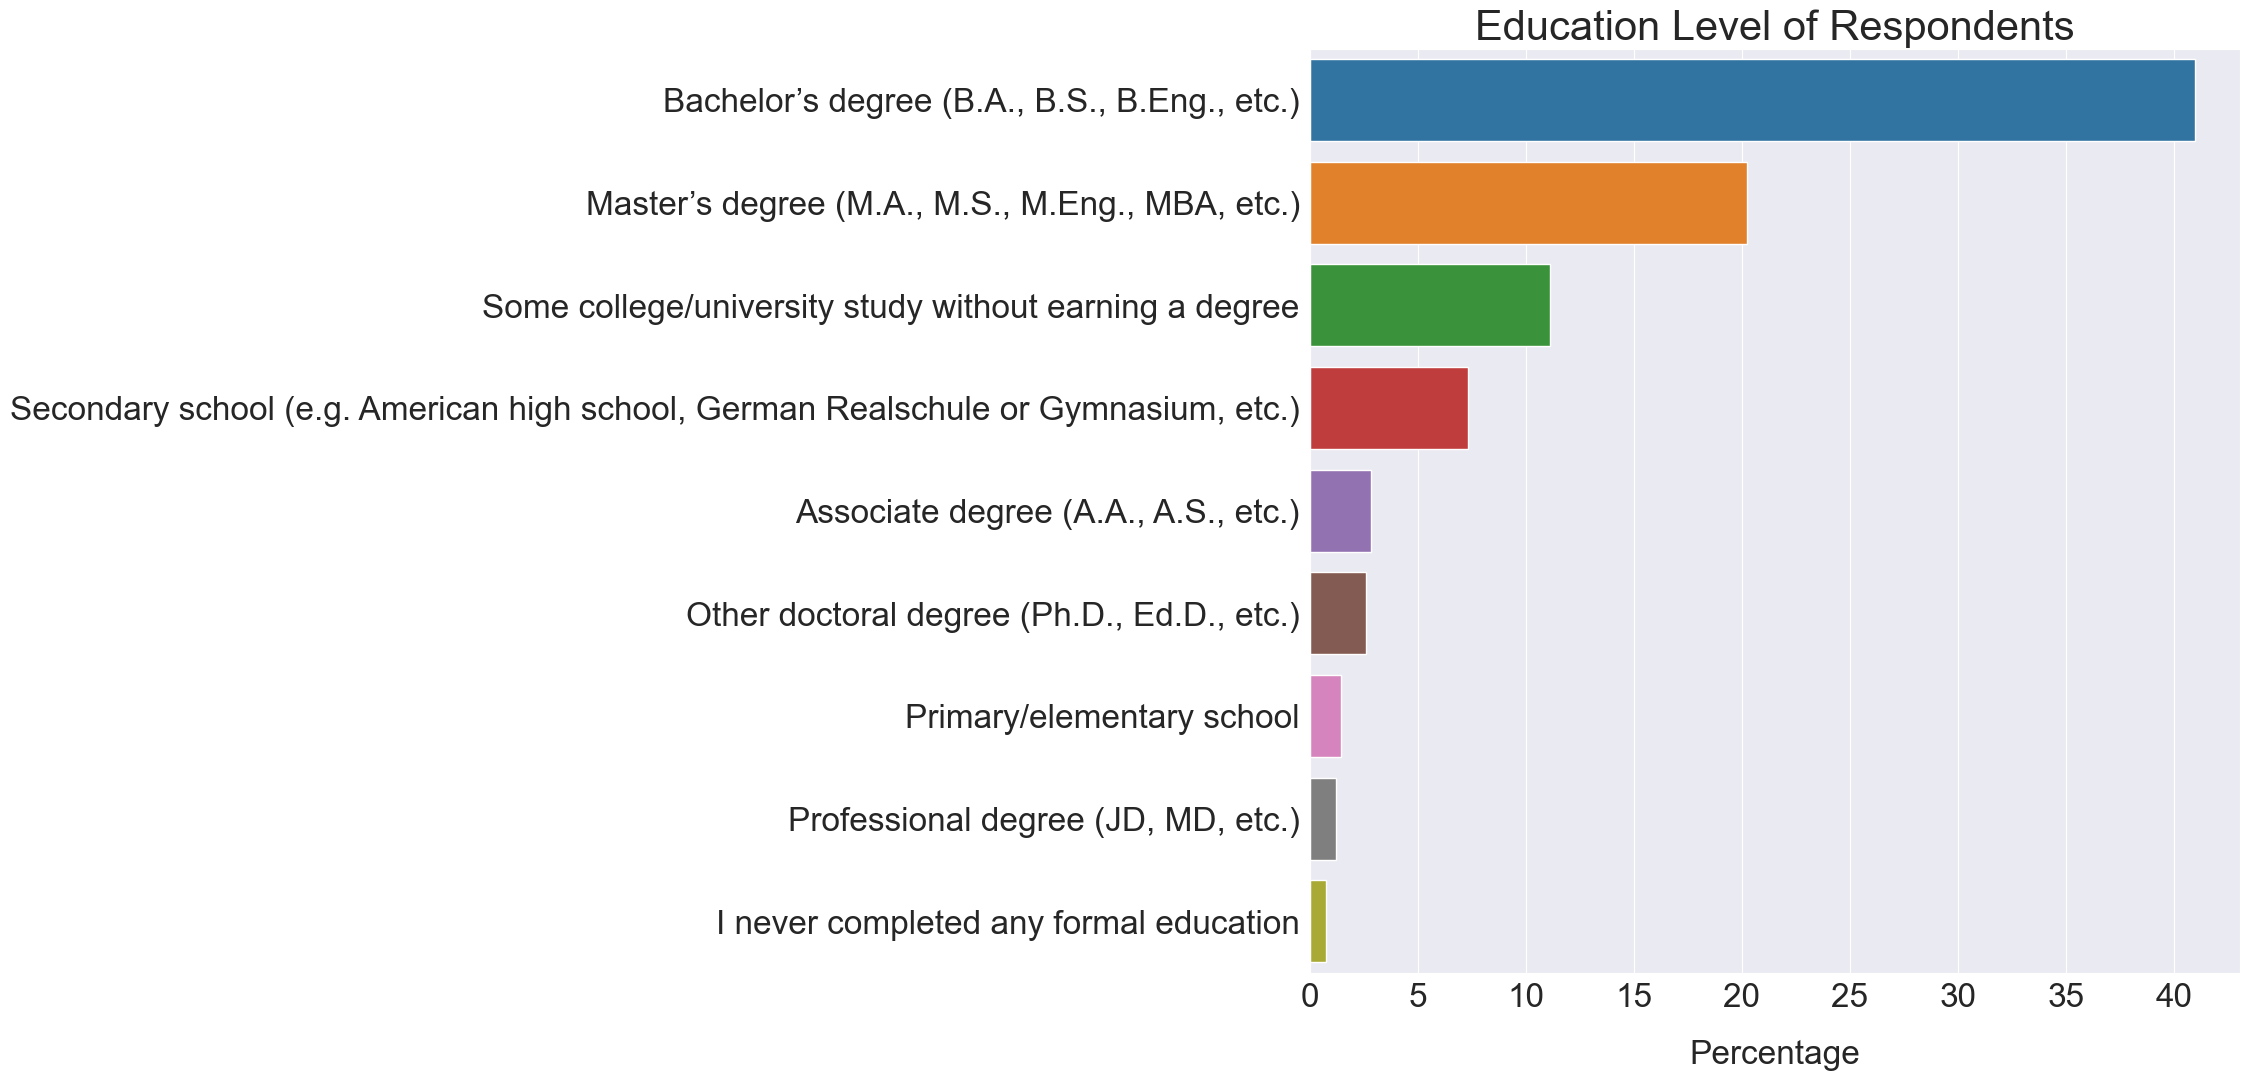

In [143]:
plt.figure(figsize=(12,12))
sns.barplot(x=Edpct,y=Edpct.index)
plt.title('Education Level of Respondents',fontsize=30)
plt.ylabel(None)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Percentage',fontsize=24,labelpad=19);

Let's see the Gender wise Education Level of the respondents.

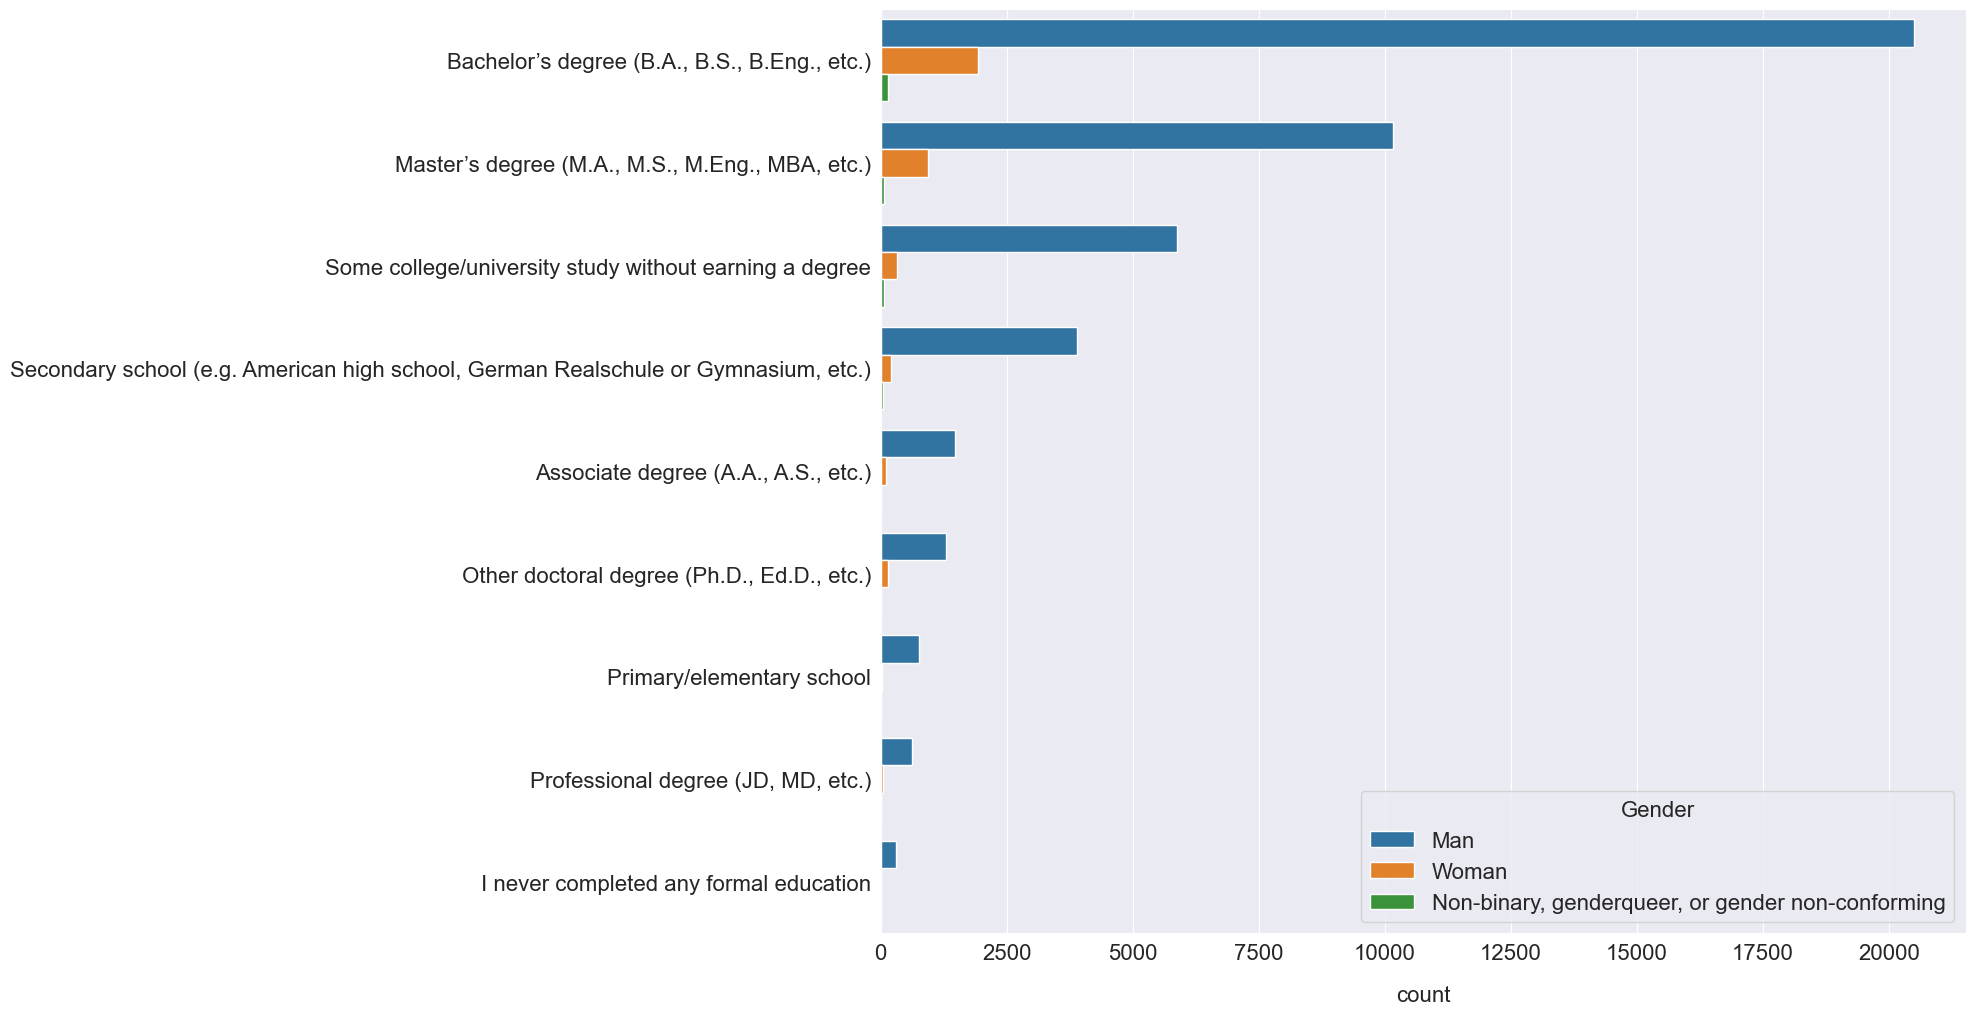

In [144]:
plt.figure(figsize=(14,12))
sns.countplot(y='EdLevel',hue='Gender',data=survey_df,order=Edcount.index)
plt.ylabel(None)
plt.xlabel('count',labelpad=16);

In [145]:
gen_df=survey_df[survey_df['Gender'].isin(['Man','Woman'])]
gen_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,18-30 years
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,30-45 years
5,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,No,14.0,6.0,4.0,HTML/CSS;Java;JavaScript,...,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never,Fairly important,NaN
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,...,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,30-45 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64437,Pakistan,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,25.0,NaN,3.0,NaN,...,Once every few years,Visit Stack Overflow,Employed full-time,Data or business analyst,NaN,NaN,NaN,NaN,Very important,NaN
64438,Morocco,NaN,Man,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Python;Ruby;TypeScript,...,NaN,Meditate;Play games;Watch help / tutorial videos,NaN,NaN,NaN,NaN,NaN,NaN,Very important,NaN
64439,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I never declared a major,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64441,Canada,17.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,10.0,7.0,NaN,C;C#;C++;Java,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,NaN,NaN,NaN,10-18 years


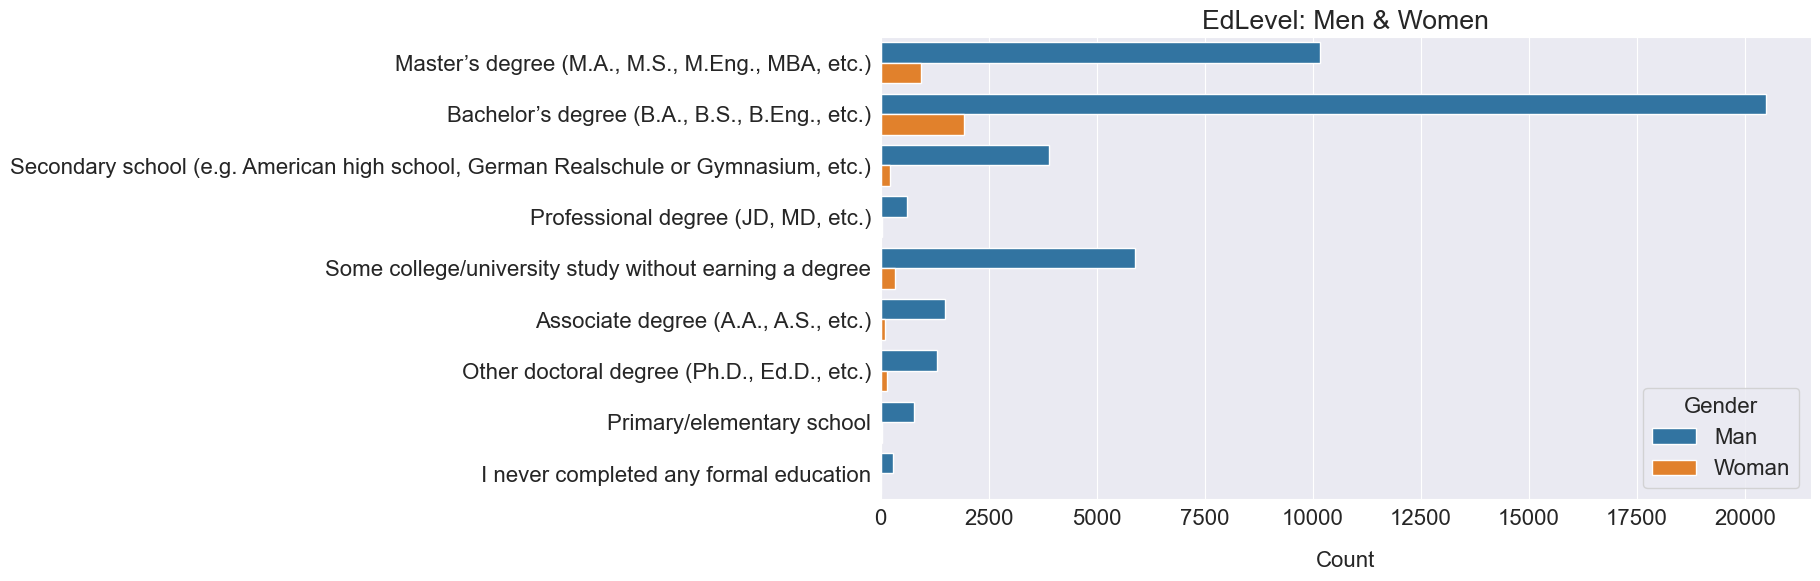

In [146]:
plt.title('EdLevel: Men & Women')
sns.countplot(y='EdLevel',hue='Gender',data=gen_df)
plt.ylabel(None)
plt.xlabel('Count',labelpad=16);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.    
Let's plot the undergrad majors to get some more info.

In [147]:
survey_ques.UndergradMajor

'What was your primary field of study?'

In [148]:
Ugpct=survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

In [149]:
Ugpct

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

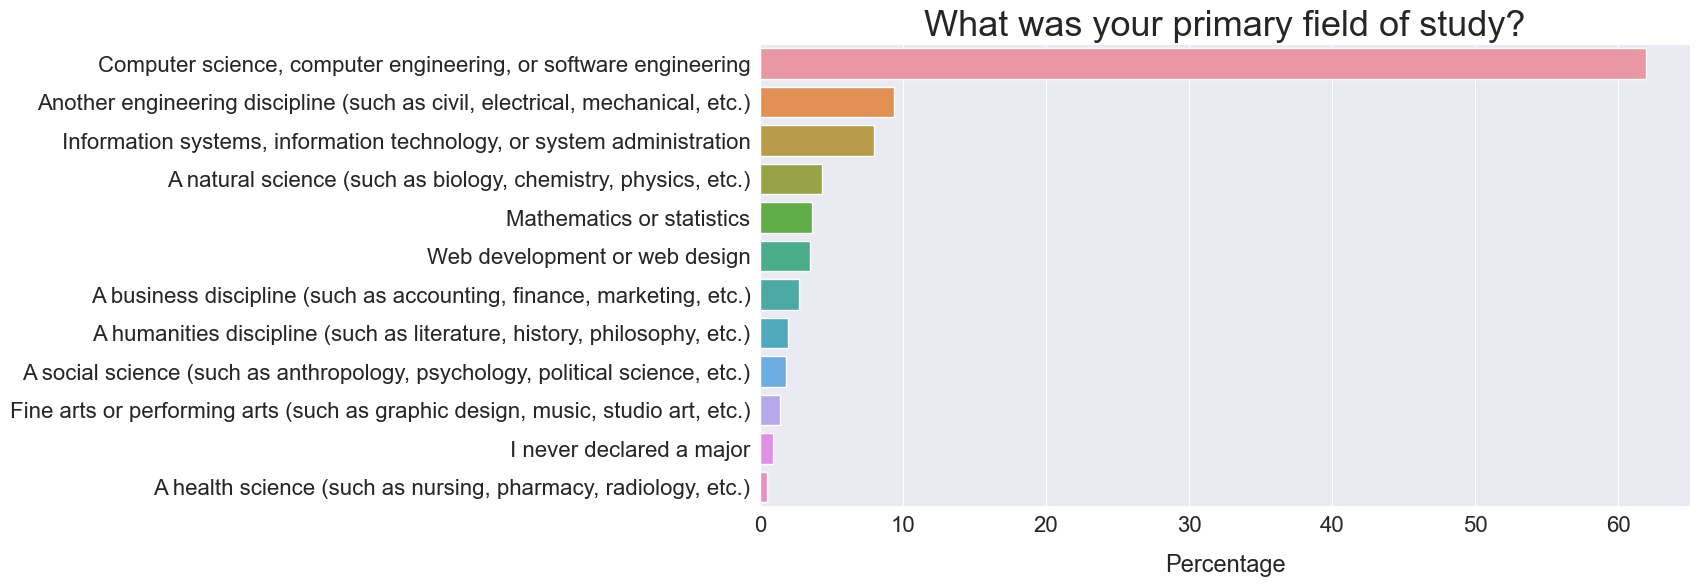

In [150]:
sns.barplot(x=Ugpct,y=Ugpct.index)
plt.title(survey_ques.UndergradMajor,fontsize=26)
plt.ylabel(None)
plt.xlabel("Percentage",fontsize=17,labelpad=13);

An interesting point to see here is that around 40% of the respondents don't have a CS degree.It suggests that you don't need to pursue a major in CS to become a successful programmer.

In [151]:
survey_ques.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [152]:
survey_df.NEWEdImpt.value_counts()

NEWEdImpt
Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: count, dtype: int64

### Employment
Let's visualize the data from Employment Column.

In [153]:
survey_ques.Employment

'Which of the following best describes your current employment status?'

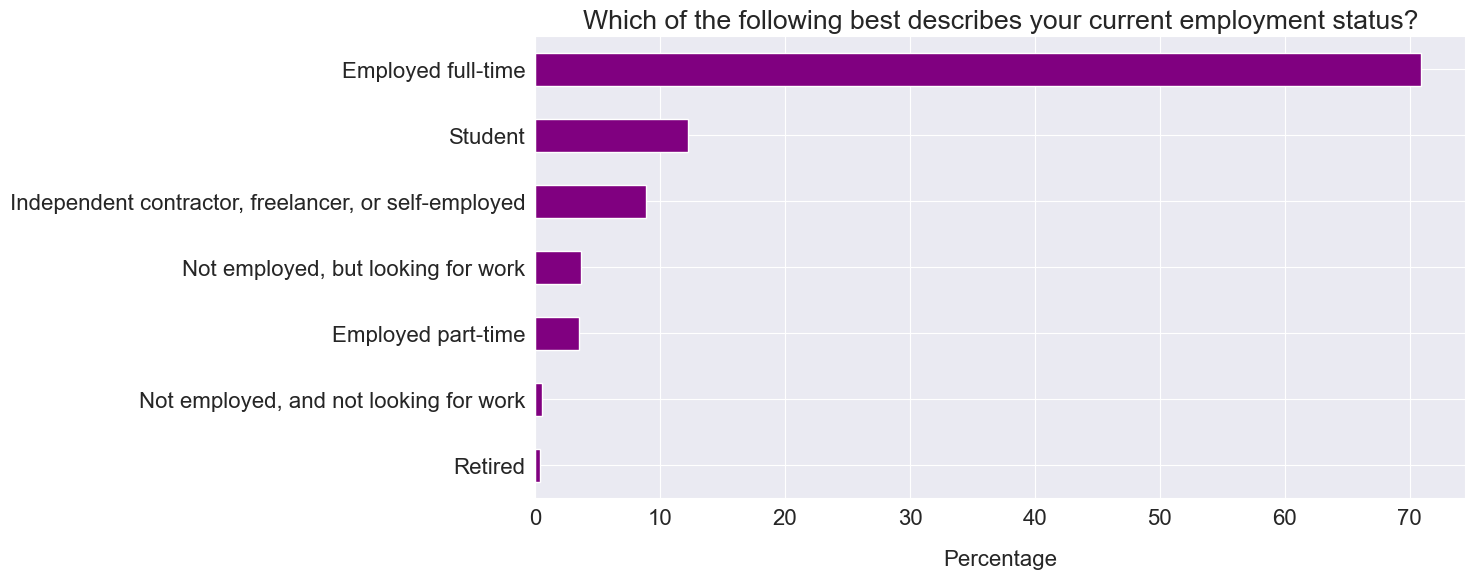

In [154]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='purple')
plt.ylabel(None)
plt.xlabel('Percentage',labelpad=15)
plt.title(survey_ques['Employment']);

It appears that almost 10% of the respondents are self-employed or freelancers.

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [155]:
survey_ques.DevType

'Which of the following describe you? Please select all that apply.'

In [156]:
survey_df['DevType'].value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [171]:
def splitter(col_series):
    # converting series to a dataframe
    resdf=col_series.to_frame()
    # an empty list to store options
    options=[]
    # Iterating over the key-value pairs in the series
    for idx,val in col_series[col_series.notnull()].items():
        for option in val.split(';'):
       # Adding option columns in the dataframe
            if not option in resdf.columns:
                options.append(option)
                resdf[option]=False
        # Mark value in option column as True
            resdf.at[idx,option]=True
    return resdf[options]

In [172]:
devdf=splitter(survey_df.DevType)

In [173]:
devdf

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [178]:
devdf.sum().sort_values(ascending=False)

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might except the most common roles include `Developer` in the name.

### Asking and Answering Questions
Let's ask some questions and try to figure out the answers for them.

**Q: What are the most popular programming languages in 2020?**

In [192]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

As we can see similar to the `DevType` column , this one also allows selecting multiple options.   
We will again use our helper function to split these options into a dataframe containing one column for each option.

In [193]:
Langdf=splitter(survey_df.LanguageWorkedWith)

In [194]:
Langdf

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [196]:
Langpct=Langdf.mean().sort_values(ascending=False)*100
Langpct

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

Now let us plot a graph to visualize this info.


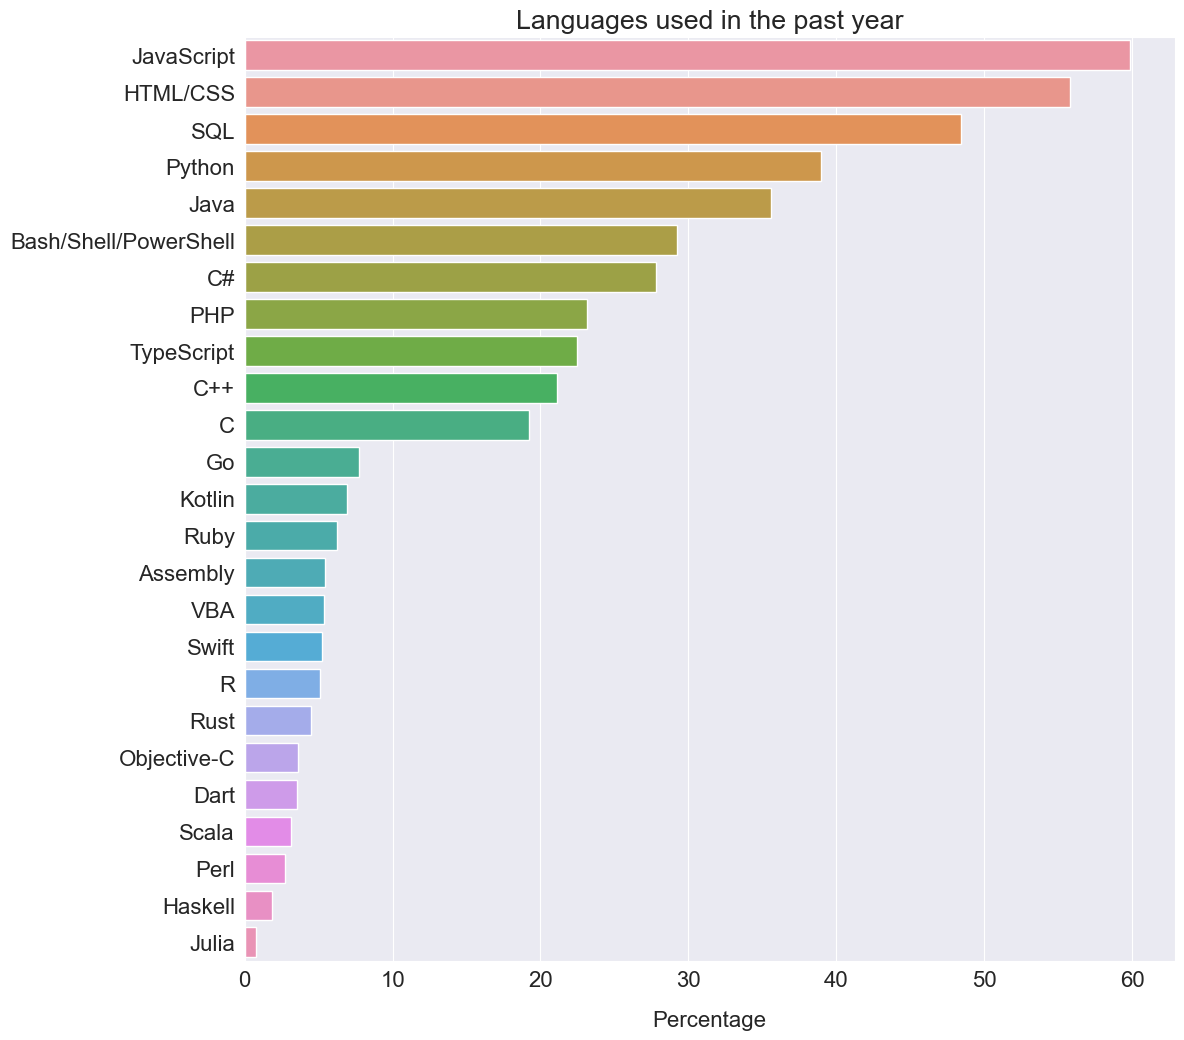

In [203]:
plt.figure(figsize=(12,12))
sns.barplot(x=Langpct,y=Langpct.index)
plt.title('Languages used in the past year')
plt.xlabel('Percentage',labelpad=14);

Javascript,HTML&CSS seems to be the most used languages as web development is one of today's most sought skills.SQL and Python are other popular languages as they are used in Data Science domain.

#### Q: Which languages are the most people interested to learn over the next year?


In [204]:
Langnextdf=splitter(survey_df.LanguageDesireNextYear)
Langnextpct=Langnextdf.mean().sort_values(ascending=False)*100
Langnextpct

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

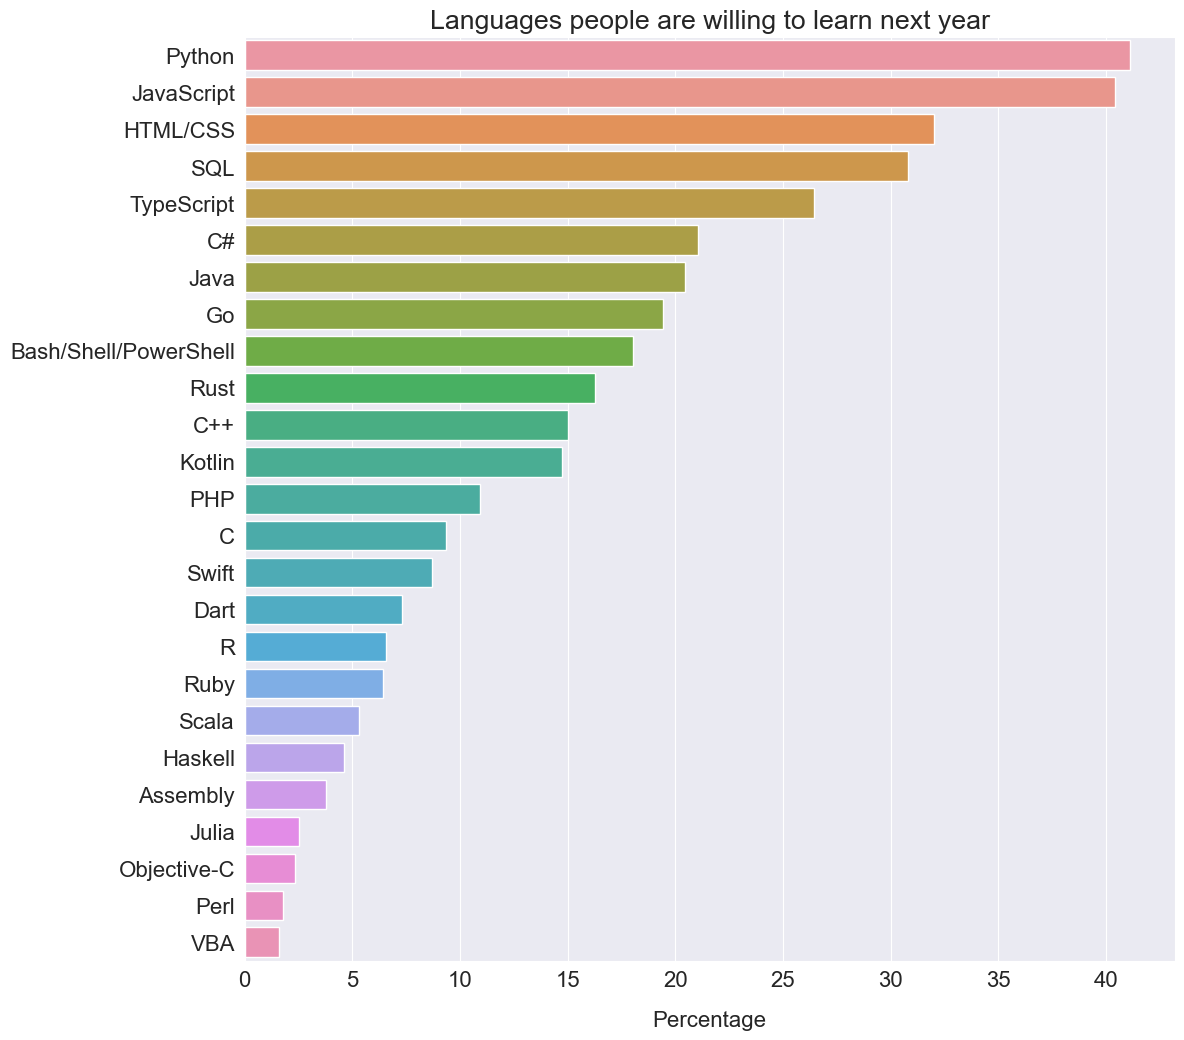

In [205]:
plt.figure(figsize=(12,12))
sns.barplot(x=Langnextpct,y=Langnextpct.index)
plt.title('Languages people are willing to learn next year')
plt.xlabel('Percentage',labelpad=14);

Woohooo, Python comes out on top. Python is an easy to use multi-purpose langauge used in different domains,that's why it has gained so much popularity lately.

**Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?**

In [206]:
Lovedlang_df=Langdf & Langnextdf

In [208]:
Lovedlangpct=(Lovedlang_df.sum()*100/Langdf.sum()).sort_values(ascending=False)

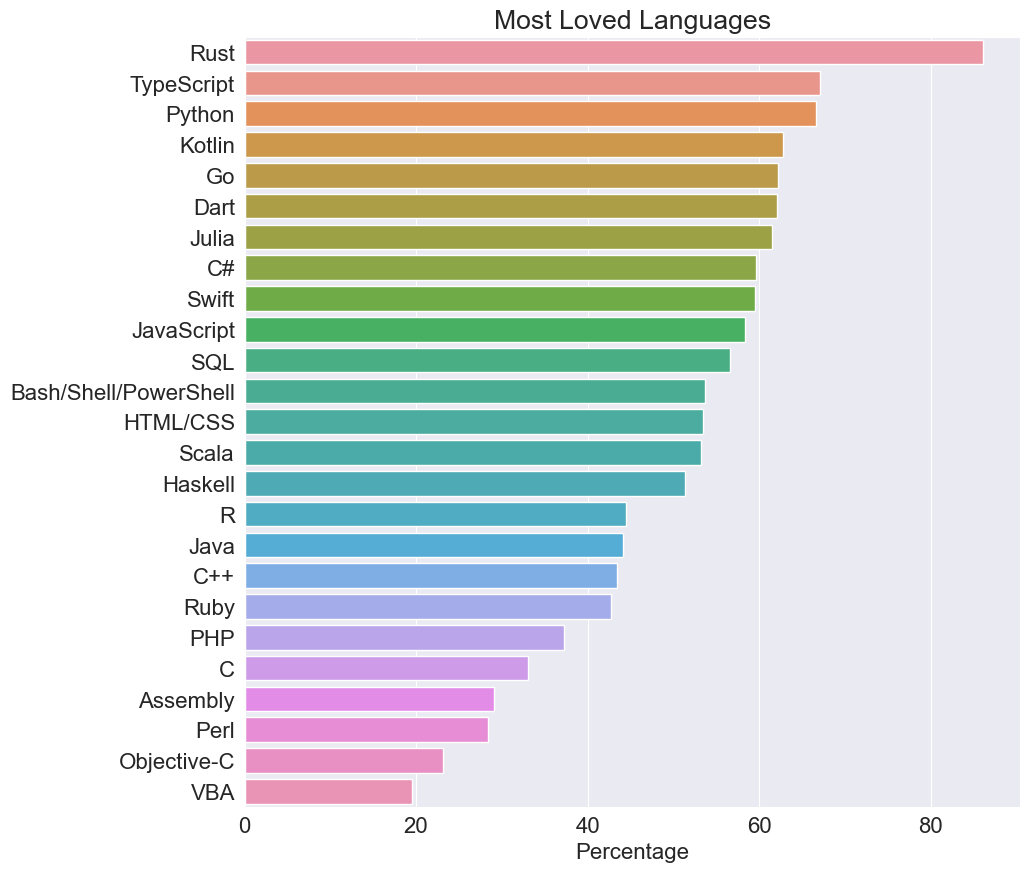

In [209]:
plt.figure(figsize=(10,10))
plt.title('Most Loved Languages')
plt.xlabel('Percentage')
sns.barplot(x=Lovedlangpct,y=Lovedlangpct.index);

`Rust` has been Stack Overflow's most loved language for 8 years in a row. That's pretty impressive.
Python also does well despite being one of the most used languages in the world.

**Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

In [211]:
countrydf=survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)

In [216]:
countdf=countrydf.loc[survey_df.Country.value_counts()>250].head(15)

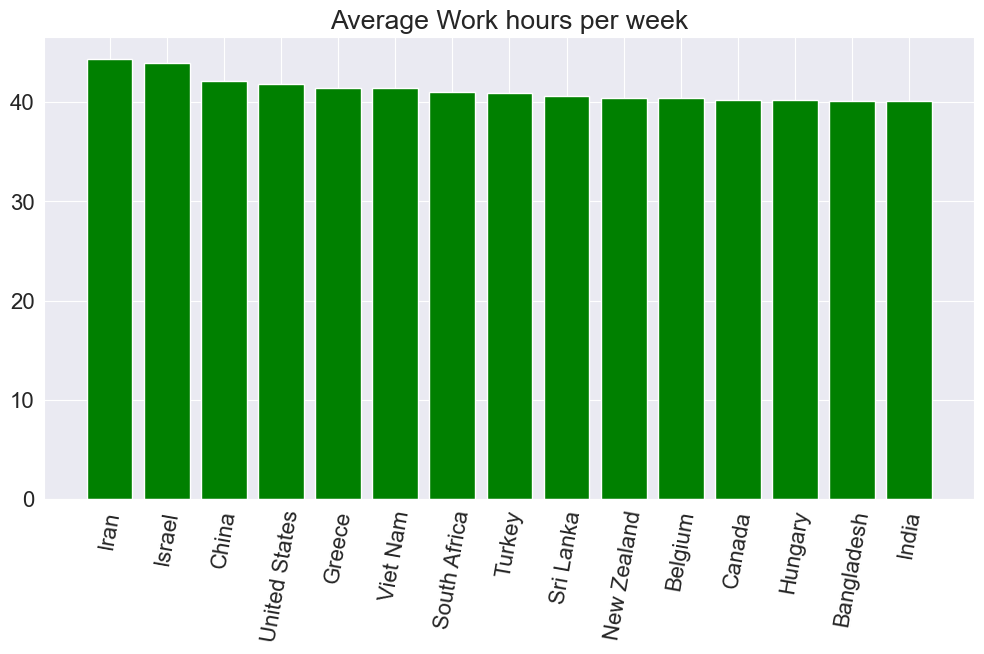

In [226]:
plt.title('Average Work hours per week')
plt.bar(countdf.index,countdf.WorkWeekHrs,color='g')
plt.xticks(rotation=80);

**Q: How important is it to start young to build a career in programming?**

Let's create a scatterplot of `Age` vs `YearsCodePro` to answer this question.

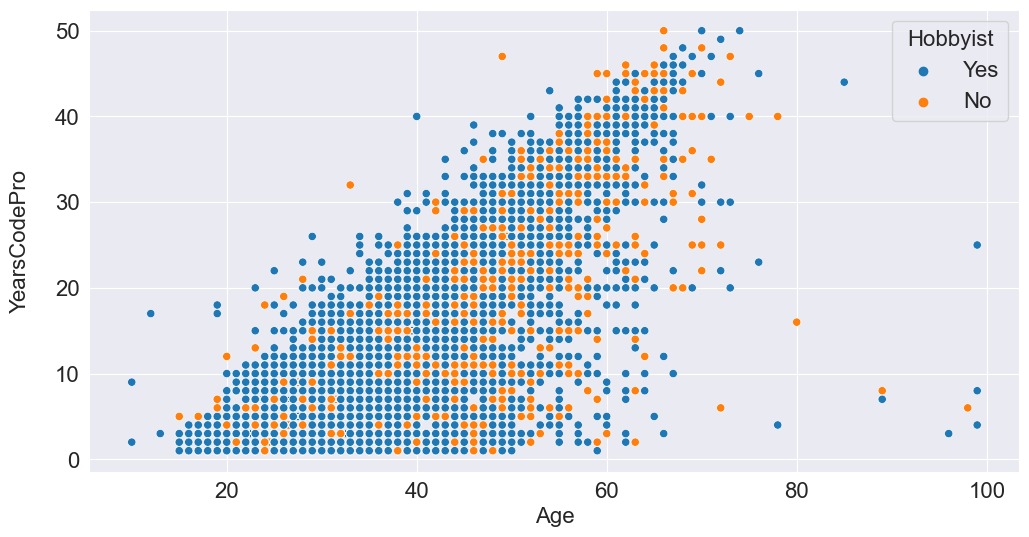

In [228]:
sns.scatterplot(x='Age',y='YearsCodePro',hue='Hobbyist',data=survey_df)
plt.xlabel("Age")
plt.ylabel('YearsCodePro',labelpad=18);

 We can see points scattered all over the graph which indicates that programming can be started at any age. Many people who have  been coding professionally for years also seem to enjoy it as a hobby.

Let's plot one more graph to see when the respondents tried programming for the first time.

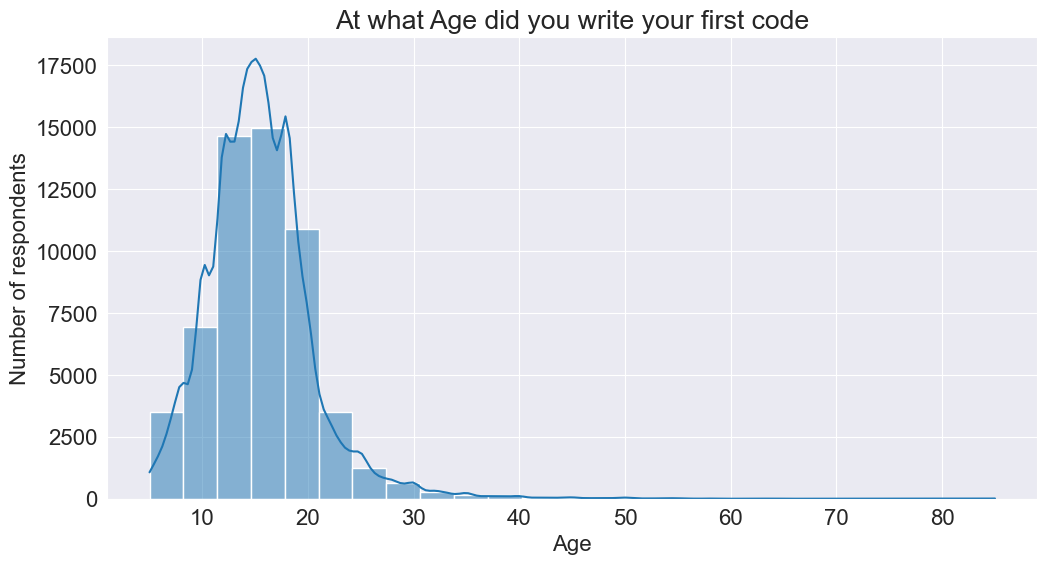

In [232]:
plt.title('At what Age did you write your first code')
sns.histplot(x=survey_df.Age1stCode,bins=25,kde=True)
plt.xlabel('Age')
plt.ylabel('Number of respondents');

Most of the respondents had their first taste of coding at a young age, however there are people of all ages learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.
